# Notes from Deep Learning with Python using Keras by Francois Chollet
My notes implementing codes from the book to practice implementing deep learning algorithms in Keras

In [167]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers

print(sys.version)
print(tf.__version__)

3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 18:11:28) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.4.1


## MNIST dataset
Basic structure of a neural network in Keras using the MNIST dataset

In [168]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [169]:
# import the mnist data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# network architecture using Sequential class
# network = models.Sequential()
# network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# network.add(layers.Dense(10, activation='softmax'))

# same network architecture but using functional API
# gives more control over network architecture
input_tensor = layers.Input(shape=(28 * 28,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)  # why softmax here and not relu ???

network = models.Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
# compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# prepare image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# prepare labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# fit the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
# evaluate model
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

## Binary classification example using the IMDB dataset
Binary sentiment classification (positive or negative review) using movie reviews from the IMDB dataset

In [56]:
from keras.datasets import imdb

In [59]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [128]:
print("Shape:", train_data.shape)
print("An example of an element in train_data: type is {} if length: {}".format(type(train_data[0]), len(train_data[0])))
print("Max word index: ", max([max(x) for x in train_data]))
print("Min word index: ", min([min(x) for x in train_data]))
print(len(train_data))

Shape: (25000,)
An example of an element in train_data: type is <class 'list'> if length: 218
Max word index:  9999
Min word index:  1
25000


In [121]:
# get words from word_index of an example in the training data
# word index in train_data has been scaled up by 3
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [123]:
# another way to understand how the indexing work in the data
# The idea is that the word index given in the dictionary imdb.get_word_index()
# does not align with the word index in train_data from imdb.load_data().
# Indices 0, 1, and 2 in train_data is reserved for PADDING, START, and UNKNOWN
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}

word_index['PADDING'] = 0
word_index['START'] = 1
word_index['UNKNOWN'] = 2

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(' '.join([reverse_word_index.get(i, '?') for i in train_data[0]]))

START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNKNOWN is an amazing actor and now the same being director UNKNOWN father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for UNKNOWN and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also UNKNOWN to the two little boy's that played the UNKNOWN of norman and paul they were just brilliant children are often left out of the UNKNOWN list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prais

In [130]:
# encode the interger sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # dimension is the top 10,000 words
    
    # create a matrix of zeros where a review is
    # along the row and its words are each in the columns
    results = np.zeros((len(sequences), dimension))
    
    # for a given row, replace 0 with 1 if integer
    # corresponding to word is in the review
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1.

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [140]:
# vectorize labels (just cast it as a float32)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [141]:
# create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [162]:
# Model 1 (trained for 16 epochs)

# build network architecture
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.5409 - acc: 0.7652 - val_loss: 0.4497 - val_acc: 0.8360
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.3298 - acc: 0.9006 - val_loss: 0.3176 - val_acc: 0.8863
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2377 - acc: 0.9267 - val_loss: 0.2832 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1863 - acc: 0.9404 - val_loss: 0.2753 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1496 - acc: 0.9535 - val_loss: 0.2871 - val_acc: 0.8848
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1262 - acc: 0.9603 - val_loss: 0.3094 - val_acc: 0.8782
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1037 - acc: 0.9690 - val_loss: 0.3004 - 

In [163]:
# evaluate model using test set
model1.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 65us/step


[0.7317162918460369, 0.8546]

In [164]:
# model.fit() return's a history object with a 
# record of everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])

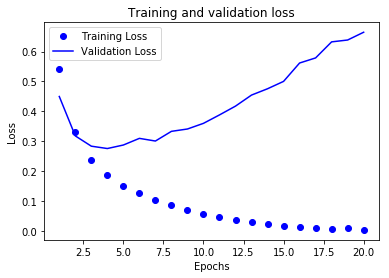

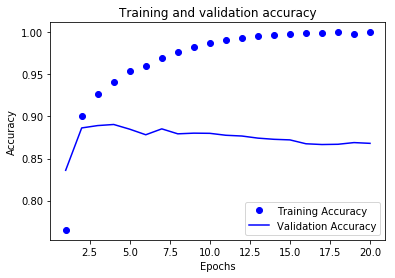

In [165]:
# plot trainng and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Some overfitting going on here. Try a different model where we train only for 4 epochs.

In [160]:
# Model 2 (trained for only 4 epochs)

# build network architecture
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 202us/step - loss: 0.5014 - acc: 0.7918 - val_loss: 0.3708 - val_acc: 0.8696
Epoch 2/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.2952 - acc: 0.8997 - val_loss: 0.3001 - val_acc: 0.8860
Epoch 3/4
15000/15000 [==============================] - 2s 110us/step - loss: 0.2150 - acc: 0.9302 - val_loss: 0.2817 - val_acc: 0.8882
Epoch 4/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.1679 - acc: 0.9435 - val_loss: 0.2806 - val_acc: 0.8892


In [161]:
# evaluate model using test set
model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 70us/step


[0.2986868525028229, 0.87804]

Predictions using test set for model 2, trained only in 4 epochs, is 2.5 percentage points more accurate than model 1. Note that test set has now leaked into the model.

In [166]:
# using the trained network to generate predictions on new data
# output is an array of probabilities that the example is a positive sentiment
model1.predict(x_test)

array([[0.00482323],
       [0.9999993 ],
       [0.5208784 ],
       ...,
       [0.00585634],
       [0.0192093 ],
       [0.634177  ]], dtype=float32)

# More Experiments (to be added)

# Notes

1. Epoch, batch size, iteration ([Reference](https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks))
    * one __epoch__: one forward pass and one backward pass of _all_ the training the training examples
    * __batch size__: the number of training examples in _one_ forward/backward pass. Larger batch sizes need more memory space.
    * one __iteration__: one forward + one backward pass of a given batch



